In [1]:
import matplotlib
import matplotlib.pyplot as plt
import sklearn.decomposition
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [16]:
filename = '../SampleWavFiles/congas.wav'
audio, sr = librosa.load(filename)
num_sources = 5

print('Audio Shape:', audio.shape)
print('Sample Rate:', sr)

Audio Shape: (96213,)
Sample Rate: 22050


In [17]:
ipd.Audio(audio, rate=sr)

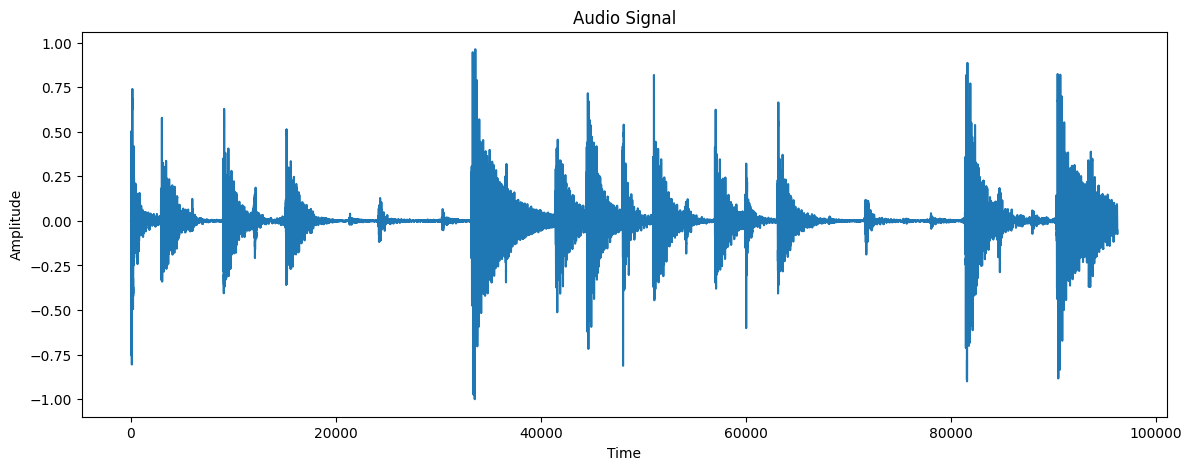

In [18]:
# Plot the audio signal
plt.figure(figsize=(14, 5))
plt.plot(audio)
plt.title('Audio Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

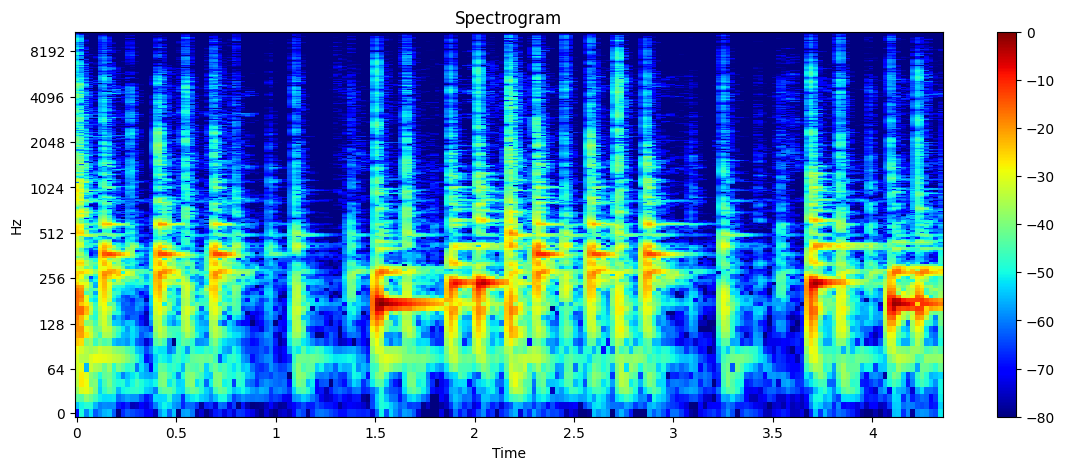

In [19]:
# Plot the spectrogram
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X), ref=np.max)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis ='time', y_axis='log', cmap=matplotlib.cm.jet)
plt.colorbar()
plt.title('Spectrogram')
plt.show()

In [20]:
# Get magnitude and phase of the signal
mag, phase = librosa.magphase(X)

# Perform NMF
n_components = num_sources
model = sklearn.decomposition.NMF(n_components=n_components, init='nndsvd')
W = model.fit_transform(mag)
H = model.components_

print('W Shape:', W.shape)
print('H Shape:', H.shape)

W Shape: (1025, 5)
H Shape: (5, 188)


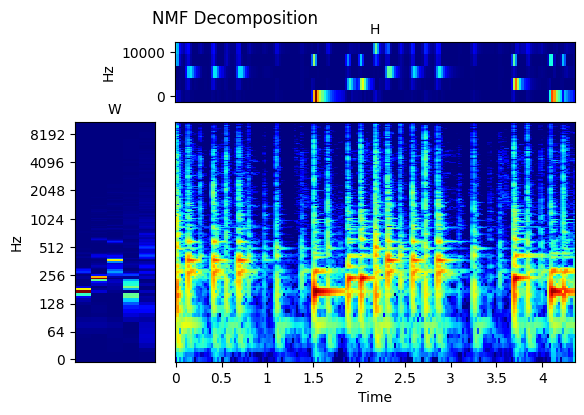

In [21]:
f = plt.figure(figsize=(4,4))

V_plot = plt.axes([0.35, 0.1, 1, 0.6])
H_plot = plt.axes([0.35, 0.75, 1, 0.15])
W_plot = plt.axes([0.1, 0.1, 0.2, 0.6])

librosa.display.specshow(W, y_axis='log', sr=sr, x_axis='time', cmap=matplotlib.cm.jet, ax=W_plot)
librosa.display.specshow(H, y_axis='hz', sr=sr, x_axis='time', cmap=matplotlib.cm.jet, ax=H_plot)
librosa.display.specshow(Xdb, y_axis='log', sr=sr, x_axis='time', cmap=matplotlib.cm.jet, ax=V_plot)

W_plot.set_title('W', fontsize=10)
H_plot.set_title('H', fontsize=10)

W_plot.axes.get_xaxis().set_visible(False)
H_plot.axes.get_xaxis().set_visible(False)
V_plot.axes.get_yaxis().set_visible(False)

f.suptitle('NMF Decomposition', fontsize=12)
plt.show()

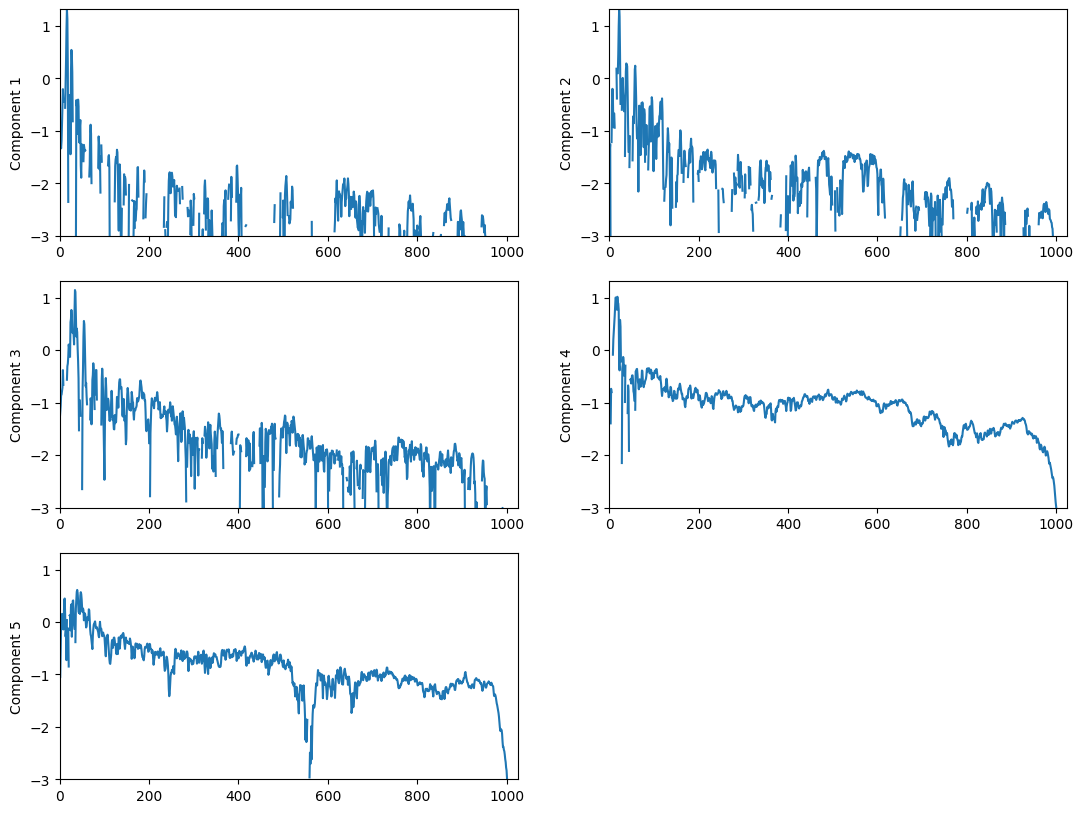

In [22]:
plt.figure(figsize=(13, n_components * 2))
logW = np.log10(W)
for n in range(n_components):
    plt.subplot(int(np.ceil(n_components / 2)), 2, n+1)
    plt.plot(logW[:, n])
    plt.ylim(-3, logW.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel(f'Component {n + 1}')

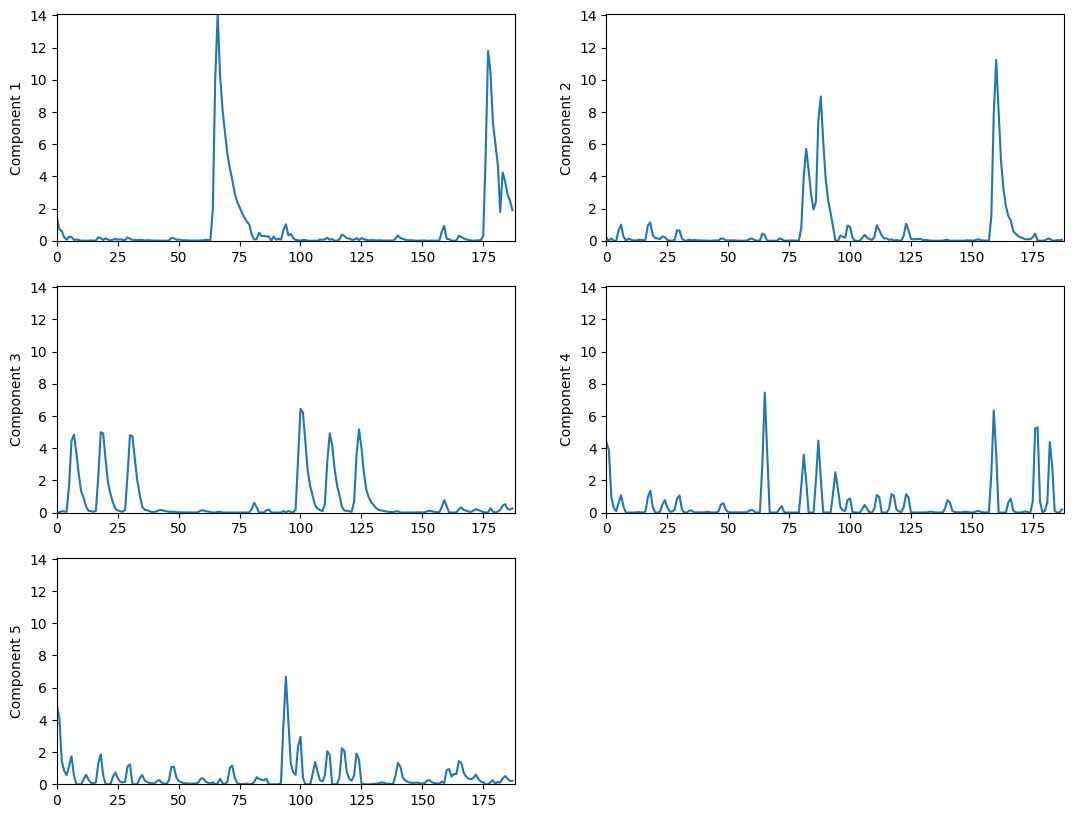

In [23]:
plt.figure(figsize=(13, n_components * 2))
for n in range(n_components):
    plt.subplot(int(np.ceil(n_components / 2)), 2, n + 1)
    plt.plot(H[n])
    plt.ylim(0, H.max())
    plt.xlim(0, H.shape[1])
    plt.ylabel(f'Component {n + 1}')

plt.show()


In [24]:
reconstructed_components = []
for n in range(n_components):
    
    # Re-create the STFT of a single NMF component.
    Y = np.outer(W[:,n], H[n]) * phase
    
    # Transform the STFT into the time domain.
    y = librosa.istft(Y)

    reconstructed_components.append(y)

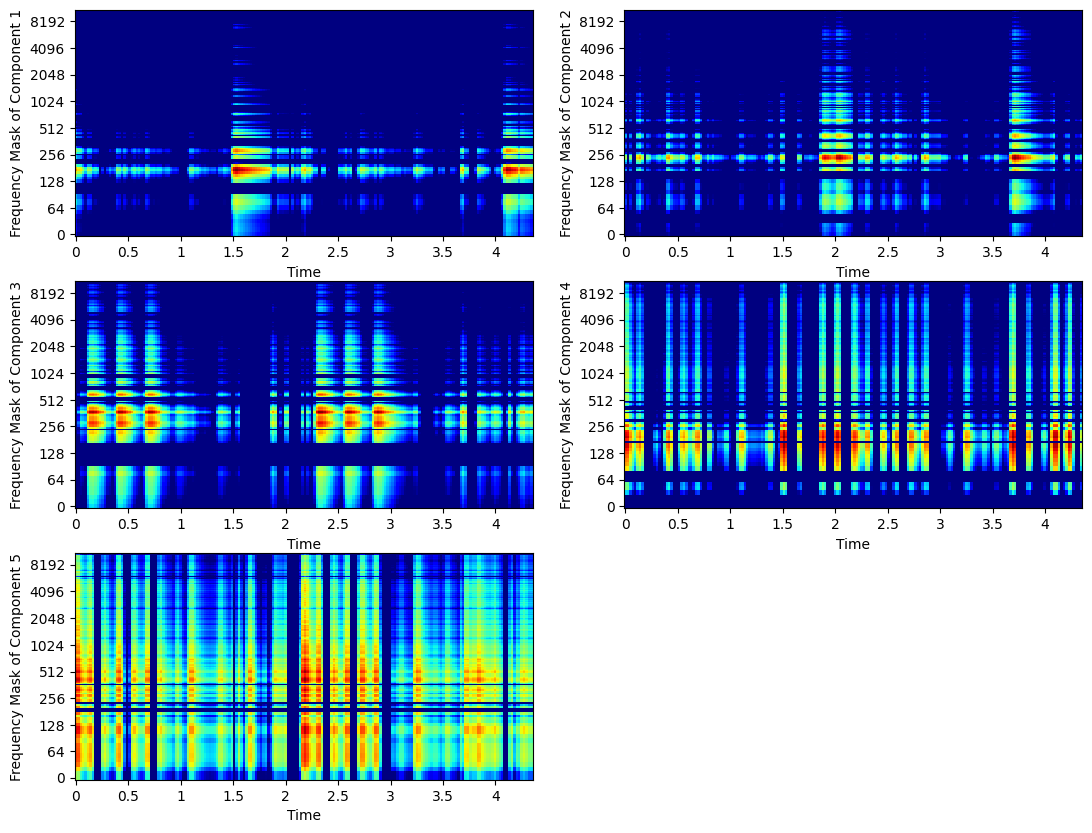

In [25]:
plt.figure(figsize=(13, n_components * 2))
for n in range(n_components):
    plt.subplot(int(np.ceil(n_components / 2)), 2, n + 1)
    filtered_spectrogram = W[:,[n]] @ H[[n],:]
    D = librosa.amplitude_to_db(filtered_spectrogram, ref=np.max)
    librosa.display.specshow(D, y_axis='log', sr=sr, x_axis='time', cmap=matplotlib.cm.jet)
    plt.ylabel(f'Frequency Mask of Component {n + 1}')

plt.show()

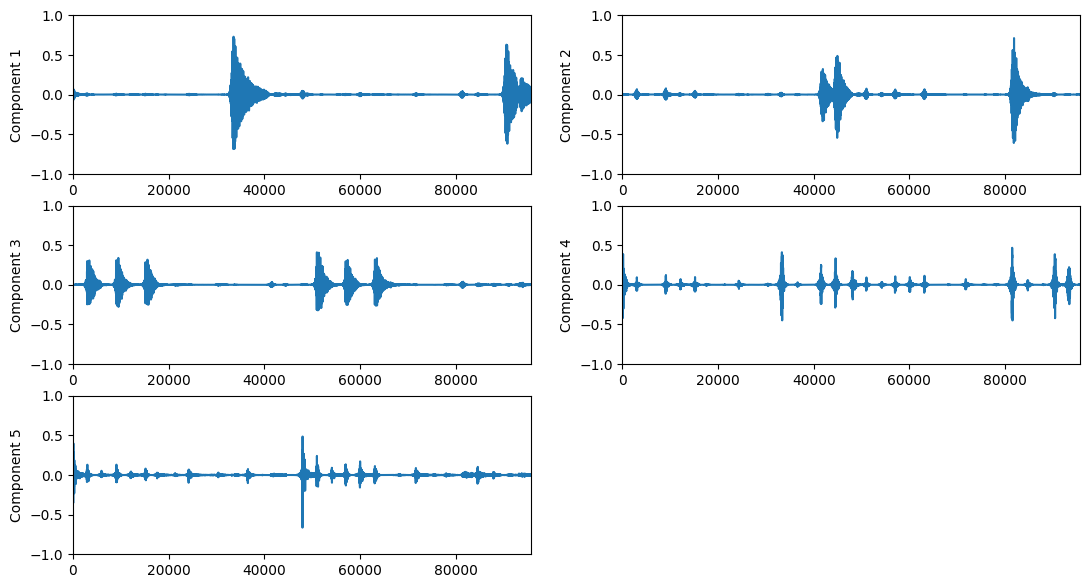

In [26]:
# display all the components
plt.figure(figsize=(13, 7))
for n in range(n_components):
    plt.subplot(int(np.ceil(n_components / 2)), 2, n + 1)
    plt.plot(reconstructed_components[n])
    plt.ylim(-1, 1)
    plt.xlim(0, reconstructed_components[n].shape[0])
    plt.ylabel(f'Component {n + 1}')

plt.show()

In [27]:
# play each reconstructed component
for i in range(n_components):
    ipd.display(ipd.Audio(reconstructed_components[i], rate=sr))

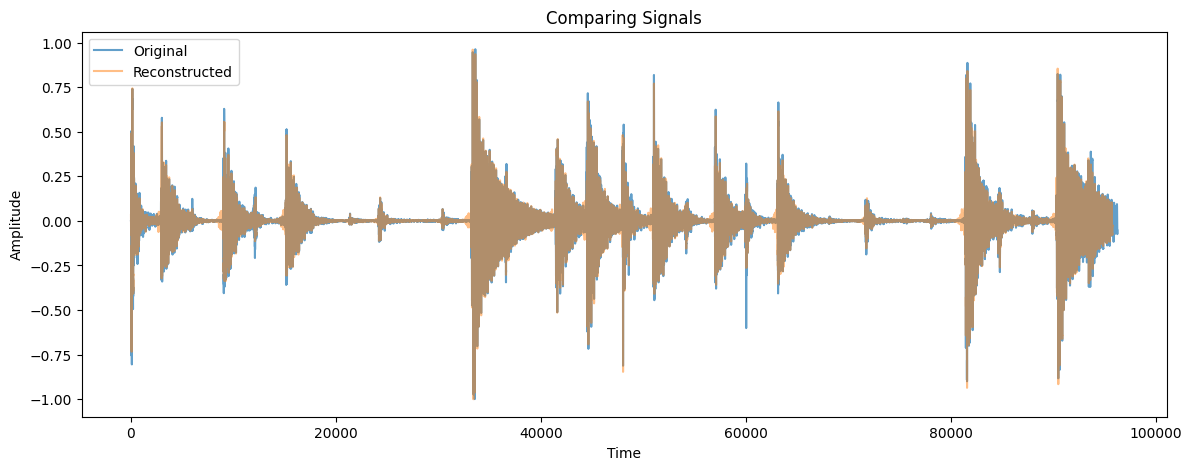

In [28]:
# Combine the components into a single signal.
reconstructed_signal = np.sum(reconstructed_components, axis=0)

# plot the reconstructed signal and the original signal
plt.figure(figsize=(14, 5))
plt.plot(audio, label='Original', alpha=0.7)
plt.plot(reconstructed_signal, label='Reconstructed', alpha=0.5)
plt.title('Comparing Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [29]:
# play the original signal
print('Original Signal')
ipd.display(ipd.Audio(audio, rate=sr))

# play the reconstructed signal
print('Reconstructed Signal')
ipd.display(ipd.Audio(reconstructed_signal, rate=sr))

Original Signal


Reconstructed Signal
